# Cálculo del valor de decisión óptimo para el caso de una regla de decisión MAP en una observación continua

In [1]:
#---------------------------------------------------------------------------------
# Project    : Tarea N°9
# Authors    : Mugni Juan Mauricio
# Affiliation: UNC
# E-mail     : mauricio.mugni@mi.unc.edu.ar
#---------------------------------------------------------------------------------

## Consigna

Considere una variable aleatoria $X \in \{ -1,3 \} $, con probabilidades a priori $P_X(-1) = 0.4$ y $P_X(+3) = 0.6$. Dada una observación $y$ de la  observación $y$ de la variable aleatoria $Y = X +N$ , donde $N$ es una variable aleatoria gaussiana de media $\mu = 0$ con varianza $\psi ^2 = 0.4$, independientemente de $X$.
- Encuentre el nivel de decisión para un detector MAP.
- Calcule analíticamente la probabilidad de error $P_e$

## Resolución


### Simulación de Monte Carlos

Primero se importa las librerías a utilizar

In [7]:
import numpy as np
import matplotlib.pyplot as plt

Se definen los datos del problema:

In [9]:
nb_samples = 100000                            # Se define la cantidad de muestras

# Datos de la distribución del ruido
media = 0                                      
varianza = 0.4
desviacion = np.sqrt(varianza)

X1 = -1                                        # Como afecta a la media de la distribución normal 
X2 = 3 

ref = 0.4                                      # Referencia para la probabilidad con que se genera -1 y 3

Se crean los vectores que contendran $\{ -1, 3 \}$ con las probabilidades indicada, y a este se le suma el ruido con la distribución correspondiente.

In [17]:
z = np.random.uniform(size = nb_samples)       # Se crea un vector con variables aleatorias entre 0 y 1

X = [X1 if z[i]<ref else X2 for i in range(len(z))]     # Se crea el vector que contiene Px(-1) con probabilidad 0.4
                                                        # y Px(+3) con probabilidad 0.6            

# Se simula la salida Y = X + H
# Se le suma a cada variable aleatoria la variable aleatoria gaussiana 
Y = [np.random.normal(media + x, desviacion) for x in X]

Se procede a graficar para visualizar como se centran ambas curvas en su media respectivamente, que son $\{ -1,3 \}$

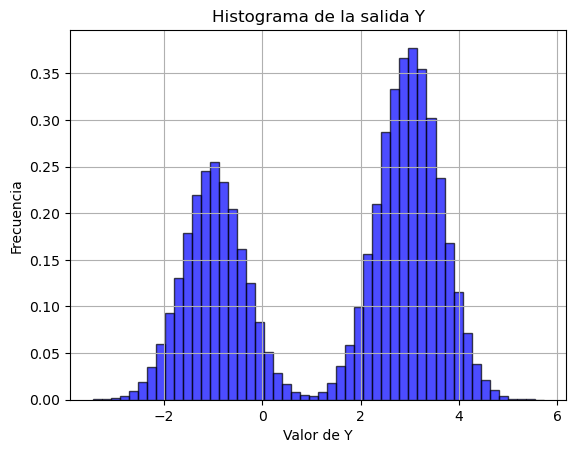

In [18]:
plt.hist(Y, bins=50, density=True, alpha=0.7, color='blue', edgecolor='black')
plt.title('Histograma de la salida Y')
plt.xlabel('Valor de Y')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

### Nivel de decisión forma cualitativa

Visualmente podemos ver como el nivel de decisión se encuentra en $1$ aproximadamente.

### Nivel de decisión forma cuantitativa

Para tomar el nivel de decisión utilizando una regla MAP partimos de lo siguiente:
$$\frac{f_{Y|-1}(y|-1)P_H(-1)}{f_Y(y)}\lesseqgtr\frac{f_{Y|3}(y|3)P_H(3)}{f_Y(y)}$$
$$f_{Y|-1}(y|-1)P_H(-1)\lesseqgtr f_{Y|3}(y|3)P_H(3)$$
Como $P_H(-1)\neq P_H(3)$ entonces se debe conciderar cada una en el calculo. Tenemos una regla de decisión MAP.
Y como el problema nos da $\mu$ y $\sigma$ concideramos una distribución Normal.
- $\quad H=3,\quad Y \sim P_{Y|H}(y|3)=\frac{1}{\sigma \sqrt{2\pi}}e^{-\frac{(y-\mu)^2}{2\sigma^2}} = \frac{1}{0.4 \sqrt{2\pi}}e^{-\frac{(y-3)^2}{2(0.4)^2}}$
- $\quad H=-1,\quad Y \sim P_{Y|H}(y|-1)=\frac{1}{\sigma \sqrt{2\pi}}e^{-\frac{(y-\mu)^2}{2\sigma^2}} = \frac{1}{0.4 \sqrt{2\pi}}e^{-\frac{(y-(-1))^2}{2(0.4)^2}}$

  $$f_{Y|-1}(y|-1)P_H(-1)\overset{\hat{H}=-1}{\underset{\hat{H}=3}\gtreqless}f_{Y|3}(y|3)P_H(3)$$

Reemplazando, nos queda:
$$\frac{1}{0.4 \sqrt{2\pi}}e^{-\frac{(y-(-1))^2}{2(0.4)^2}}0.4\overset{\hat{H}=-1}{\underset{\hat{H}=3}\gtreqless}\frac{1}{0.4 \sqrt{2\pi}}e^{-\frac{(y-3)^2}{2(0.4)^2}}0.6$$

$$-\frac{(y-(-1))^2}{2(0.4)^2}0.4\overset{\hat{H}=-1}{\underset{\hat{H}=3}\gtreqless}{-\frac{(y-3)^2}{2(0.4)^2}}0.6$$

$$(y+1)^2 0.4\overset{\hat{H}=-1}{\underset{\hat{H}=3}\gtreqless}(y-3)^2 0.6$$

$$\frac{(y+1)^2}{(y-3)^2}\overset{\hat{H}=-1}{\underset{\hat{H}=3}\gtreqless}\frac{0.6}{0.4}$$

$$\frac{y^2+2y+1}{y^2-6y+9}\overset{\hat{H}=-1}{\underset{\hat{H}=3}\gtreqless}\frac{0.6}{0.4}$$

$$y^2+2y+1\overset{\hat{H}=-1}{\underset{\hat{H}=3}\gtreqless}\frac{0.6}{0.4}(y^2-6y+9)$$

$$0\overset{\hat{H}=-1}{\underset{\hat{H}=3}\gtreqless}1.5y^2-9y+12.5-y^2-2y$$

$$0\overset{\hat{H}=-1}{\underset{\hat{H}=3}\gtreqless}0.5y^2-11y+12.5$$

$$0\overset{\hat{H}=-1}{\underset{\hat{H}=3}\gtreqless}(y-1.202)(y-20.798)$$

Podemos ver que obtengo dos soluciones ya que se resolvio una ecuación cuadratica, en este caso nos quedamos con la solución que nos interesa y que se aproxima a la decisión de manera cualitativa.

$$y = 1.202$$

Llegamos a la conclusión de que valores mayores a $1.202$ estamos en presencia de la hipotesís $H=3$ y para valores menores en la hipotesís $H=-1$.

### Probabilidad de error

Tomando el nivel de decisión calculado anteriormente:
$$1.202$$
La probabilidad de error de $H=-1$ es:
$$P_e(-1)=P_r\{y<1.202|H=-1\}=\int_{-\infty}^{1.202} f_{Y|H}(y|3) \,dy $$
$$ = \int_{-\infty}^{1.202} \frac{1}{\sigma \sqrt{2\pi}}e^{-\frac{(y-\mu)^2}{2 \sigma^2}}\,dy $$
$$ = \int_{-\infty}^{1.202} \frac{1}{\sqrt{0.4 \ 2\pi}}e^{-\frac{(y-3)^2}{2 \ 0.4}}\,dy $$
Tener en cuenta que se esta analizando la curva de $H=3$ para cuando estamos eligiendo $H=-1$ por eso $\mu = 3$
$$ P_e(-1)= 0.0022353 $$
Ahora, la probabilidad de error de $H=3$ es:
$$P_e(3)=P_r\{y>1.202|H=3\}=\int_{1.202}^{\infty} f_{Y|H}(y|-1) \,dy $$
$$ = \int_{1.202}^{\infty} \frac{1}{\sigma \sqrt{2\pi}}e^{-\frac{(y-\mu)^2}{2 \sigma^2}}\,dy $$
$$ = \int_{1.202}^{\infty} \frac{1}{\sqrt{0.4 \ 2\pi}}e^{-\frac{(y-(-1))^2}{2 \ 0.4}}\,dy $$
Tener en cuenta que se esta analizando la curva de $H=-1$ para cuando estamos eligiendo $H=3$ por eso $\mu = -1$
$$ P_e(3)= 0.000249 $$
Entonces, la probabilidad total de error va a ser, la probabilidad de que cada hipotesís ocurra (probabilidad de la fuente) por la probabilidad de error de cada hipotesís:
$$P_{eTotal} = P_e(-1)P_H(-1) + P_e(3)P_H(3)$$
$$P_{eTotal} = 0.0022353 \ 0.4 + 0.000249 \ 0.6$$
$$P_{eTotal} \approx 0.001$$
Es decir estamos teniendo un error de $0.1 \%$